In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
np.set_printoptions(linewidth=95, edgeitems=5)
sns.set_theme(style = 'white', palette = 'colorblind')
pal = sns.color_palette('colorblind')
import plotly.express as px
import time
pd.set_option('display.max_rows', 100)
from scipy.stats import shapiro
plt.style.use('ggplot')
from statsmodels.graphics.gofplots import qqplot
import re
import datetime
import math

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

### Importing the training and testing dataset

In [2]:
df_train = pd.read_csv('who-life-expectancy-prediction/training-data.csv')

### Let's explore our data

In [3]:
df_train.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0          Malta  2008   Developed              80.0             64.0   
1          Congo  2005  Developing              55.3            394.0   
2   Burkina Faso  2009  Developing              56.9            283.0   
3  Guinea-Bissau  2011  Developing              57.1            289.0   
4        Myanmar  2007  Developing              64.5            217.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0              0     7.14             2655.573684         86.0         1  ...   
1              8     2.03                0.000000          NaN       146  ...   
2             44     4.55               81.143047         92.0     54118  ...   
3              4     3.57               40.453674         86.0         0  ...   
4             58     0.26                0.530573         85.0      1088  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS           GDP  Population  \
0   72.0               8.15         72.0        0.1  21928.767000     49379.0   
1   62.0               2.42         62.0        5.9           NaN         NaN   
2   91.0               7.41         92.0        1.1    552.745552   1514199.0   
3   85.0               5.46         86.0        5.7    692.699890   1596154.0   
4   84.0               1.68         86.0        0.6     41.451000  49171586.0   

    thinness  1-19 years   thinness 5-9 years  \
0                    0.7                  0.7   
1                    8.8                  8.5   
2                    9.3                  8.8   
3                    7.8                  7.7   
4                   13.2                 13.5   

   Income composition of resources  Schooling  
0                            0.813       14.6  
1                            0.496        9.4  
2                            0.356        5.9  
3                            0.410        9.0  
4                            0.484        8.1  

[5 rows x 22 columns]

In [4]:
df_train.columns 

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Columns Description :
- 1.Country : Country
- 2.Year: Year
- 3.Status : Developed or Developing
- 4.Life expectancy in age
- 5.Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- 6.Number of Infant Deaths per 1000 population
- 7.Alcohol - Recorded per capita (15+) alcohol consumption (in liters of pure alcohol)
- 8.Percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- 9.Hepatitis B immunization coverage among 1-year-olds (%)
- 10.Measles - number of reported cases per 1000 population
- 12.Average Body Mass Index of entire population
- 12.Number of under-five deaths per 1000 population
- 13.Polio (Pol3) immunization coverage among 1-year-olds (%)
- 14.General government expenditure on health as a percentage of total government expenditure (%)
- 15.Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- 16.Deaths per 1000 live births HIV/AIDS (0-4 years)
- 17.Gross Domestic Product per capita (in USD)
- 18.Population of the country
- 19.Prevalence of thinness among children and adolescents for Age 1 to 19 (%)
- 20.Prevalence of thinness among children for Age 5 to 9 (%)
- 21.Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- 22.Number of years of Schooling (years)

In [5]:
df_train.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      6
Adult Mortality                      6
infant deaths                        0
Alcohol                            136
percentage expenditure               0
Hepatitis B                        370
Measles                              0
 BMI                                24
under-five deaths                    0
Polio                               11
Total expenditure                  158
Diphtheria                          11
 HIV/AIDS                            0
GDP                                297
Population                         444
 thinness  1-19 years               24
 thinness 5-9 years                 24
Income composition of resources    110
Schooling                          109
dtype: int64

In [6]:
df_train.duplicated().sum()

0

In [7]:
df_train.shape

(2056, 22)

As we can see, we have a lot of missing values so let's perform a simple description to decide on the strategy for those missing values

In [8]:
description = pd.DataFrame(index = list(df_train))
description['count'] = df_train.count()
description['nunique'] = df_train.nunique()
description['type'] = df_train.dtypes
description['missing_values'] = df_train.isna().sum()
description['missing_values_%']  = df_train.loc[:, df_train.isna().any()].isna().mean() * 100
description = pd.concat([description, df_train.describe().T.drop('count', axis = 1)], axis = 1)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
description

count  nunique     type  missing_values  \
Country                           2056      189   object               0   
Year                              2056       16    int64               0   
Status                            2056        2   object               0   
Life expectancy                   2050      345  float64               6   
Adult Mortality                   2050      390  float64               6   
infant deaths                     2056      175    int64               0   
Alcohol                           1920      933  float64             136   
percentage expenditure            2056     1644  float64               0   
Hepatitis B                       1686       84  float64             370   
Measles                           2056      730    int64               0   
 BMI                              2032      569  float64              24   
under-five deaths                 2056      215    int64               0   
Polio                             2045       71  float64              11   
Total expenditure                 1898      740  float64             158   
Diphtheria                        2045       79  float64              11   
 HIV/AIDS                         2056      174  float64               0   
GDP                               1759     1759  float64             297   
Population                        1612     1609  float64             444   
 thinness  1-19 years             2032      189  float64              24   
 thinness 5-9 years               2032      195  float64              24   
Income composition of resources   1946      590  float64             110   
Schooling                         1947      164  float64             109   

                                 missing_values_%        mean         std  \
Country                                       NaN         NaN         NaN   
Year                                          NaN     2007.56        4.62   
Status                                        NaN         NaN         NaN   
Life expectancy                              0.29       69.40        9.45   
Adult Mortality                              0.29      163.70      123.08   
infant deaths                                 NaN       28.69      111.35   
Alcohol                                      6.61        4.60        4.07   
percentage expenditure                        NaN      707.31     1917.74   
Hepatitis B                                 18.00       81.14       24.93   
Measles                                       NaN     2296.16    11610.47   
 BMI                                         1.17       38.67       20.08   
under-five deaths                             NaN       39.99      152.78   
Polio                                        0.54       82.79       23.35   
Total expenditure                            7.68        5.94        2.51   
Diphtheria                                   0.54       82.58       23.69   
 HIV/AIDS                                     NaN        1.75        5.18   
GDP                                         14.45     7286.20    14006.80   
Population                                  21.60 11364202.96 47913216.86   
 thinness  1-19 years                        1.17        4.82        4.42   
 thinness 5-9 years                          1.17        4.87        4.51   
Income composition of resources              5.35        0.63        0.21   
Schooling                                    5.30       12.05        3.32   

                                    min       25%        50%        75%  \
Country                             NaN       NaN        NaN        NaN   
Year                            2000.00   2004.00    2008.00    2012.00   
Status                              NaN       NaN        NaN        NaN   
Life expectancy                   39.00     63.40      72.20      75.70   
Adult Mortality                    1.00     74.00     144.00     226.00   
infant deaths                      0.00      0.00       3.00  

In [9]:
def plot_histogram(data, x, y=None):
    if y:
        color_sequence = np.random.choice(px.colors.qualitative.Plotly, size=1)[0]
        fig = px.histogram(data, x=x, y=y, color_discrete_sequence=[color_sequence])
        fig.update_layout(title=f'2D Histogram of {x} and {y}', xaxis_title=x, yaxis_title=y, bargap=0.2)
    else:
        color_sequence = np.random.choice(px.colors.qualitative.Plotly, size=1)[0]
        fig = px.histogram(data, x=x, color_discrete_sequence=[color_sequence])
        fig.update_layout(title=f'Histogram of {x}', xaxis_title=x, bargap=0.2)

    fig.show()

In [10]:
plots = ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

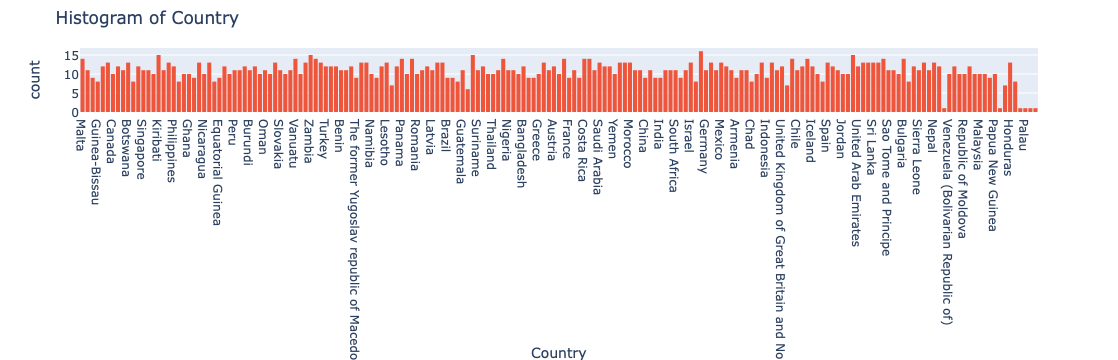

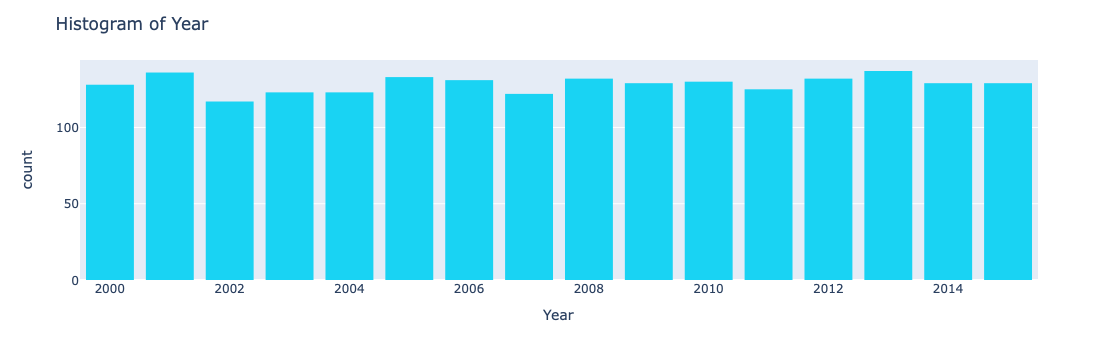

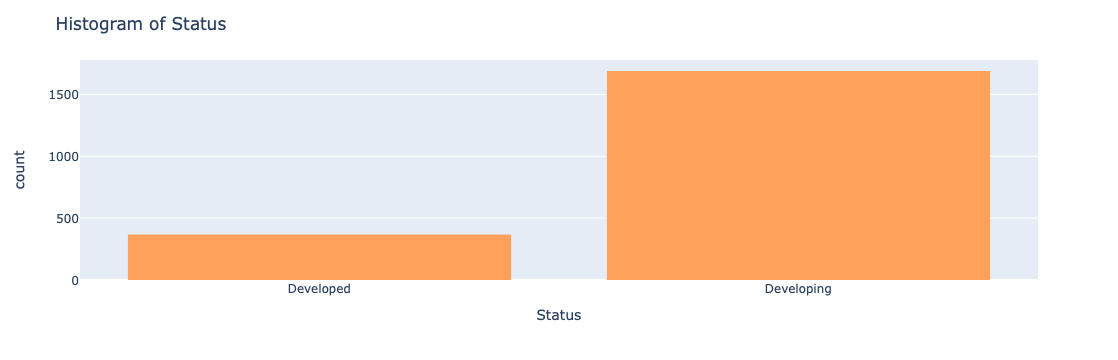

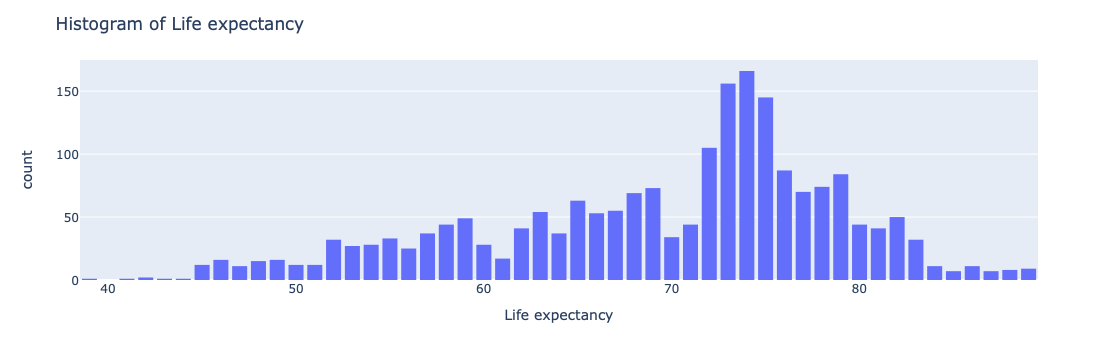

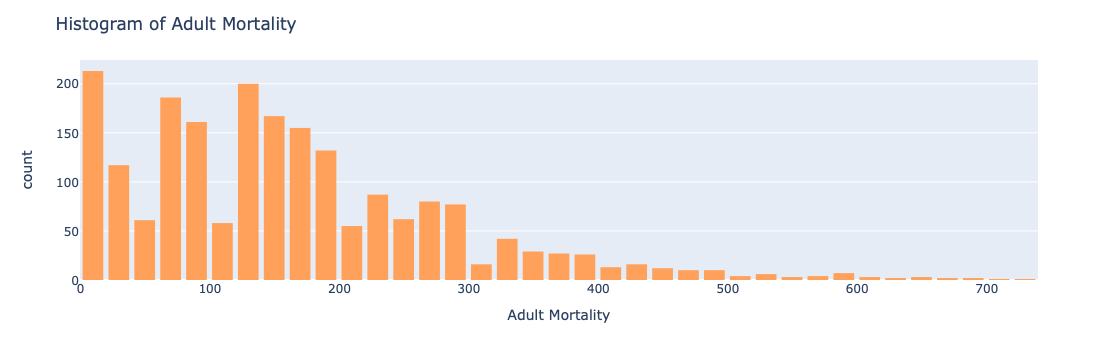

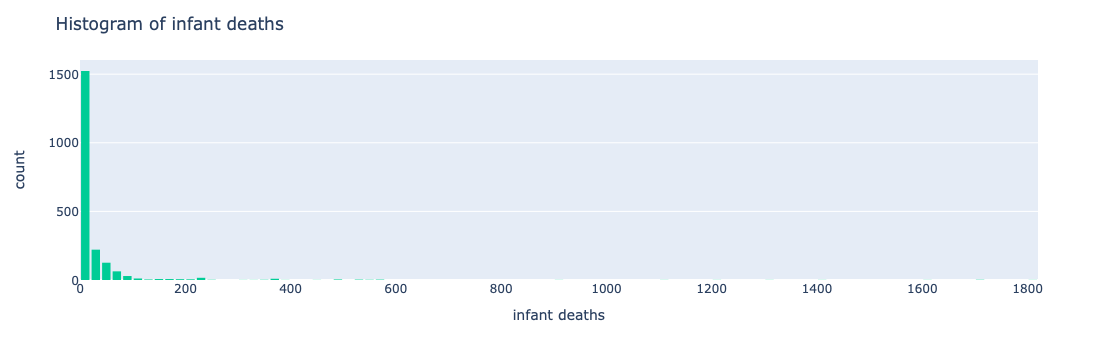

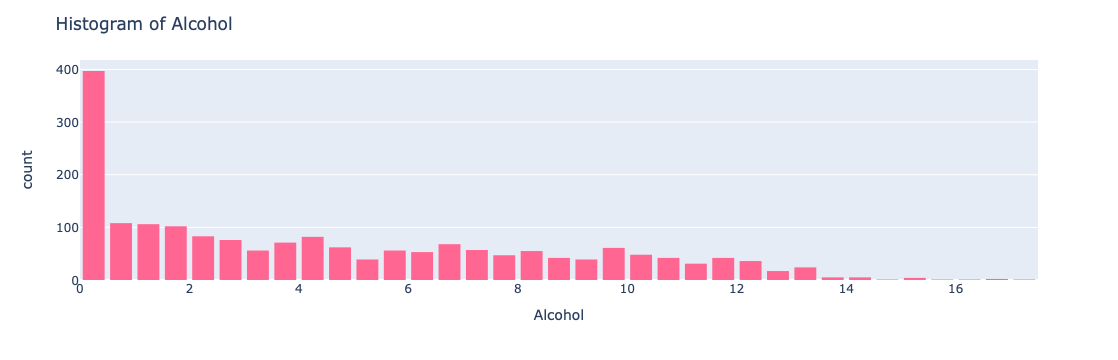

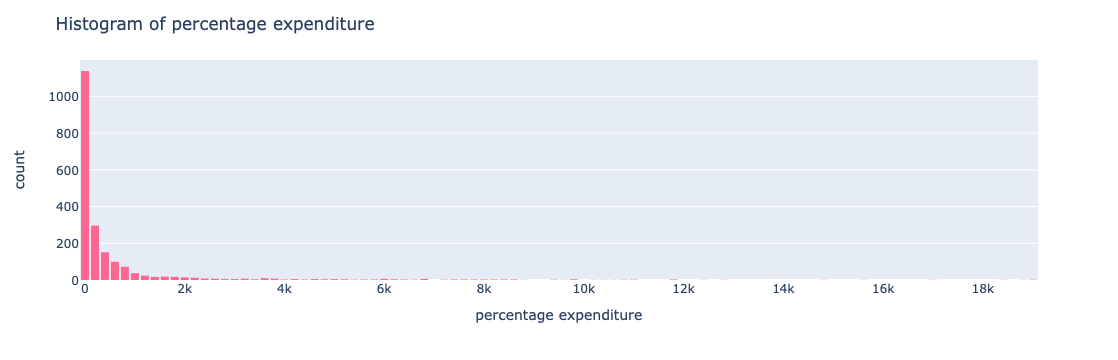

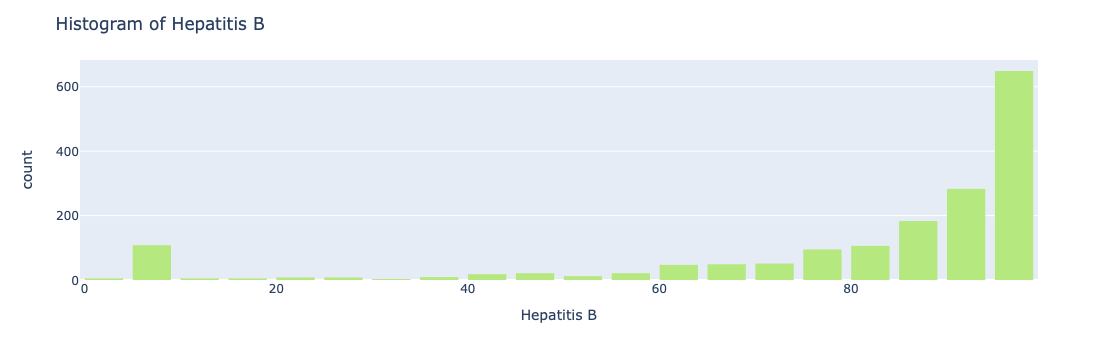

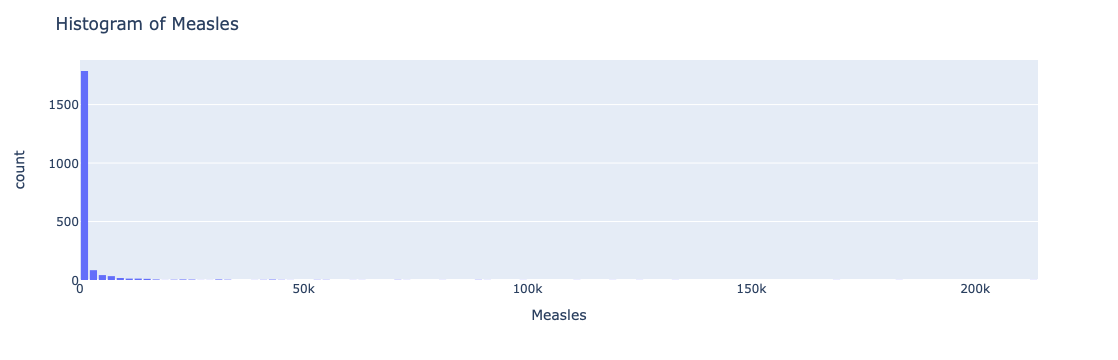

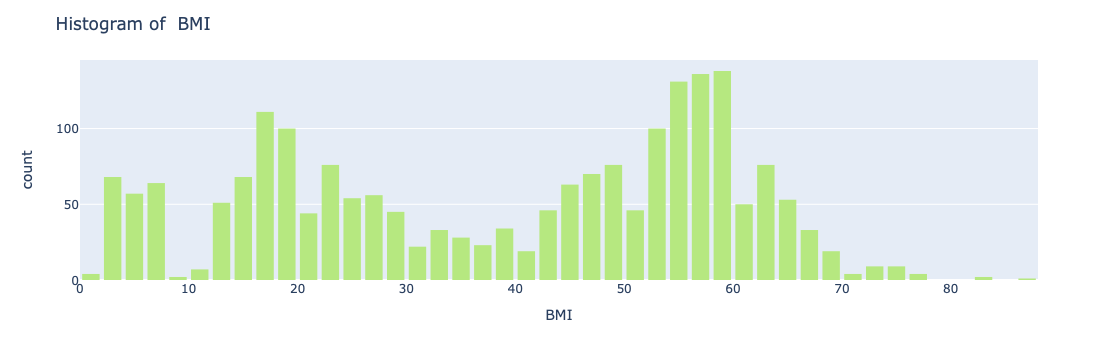

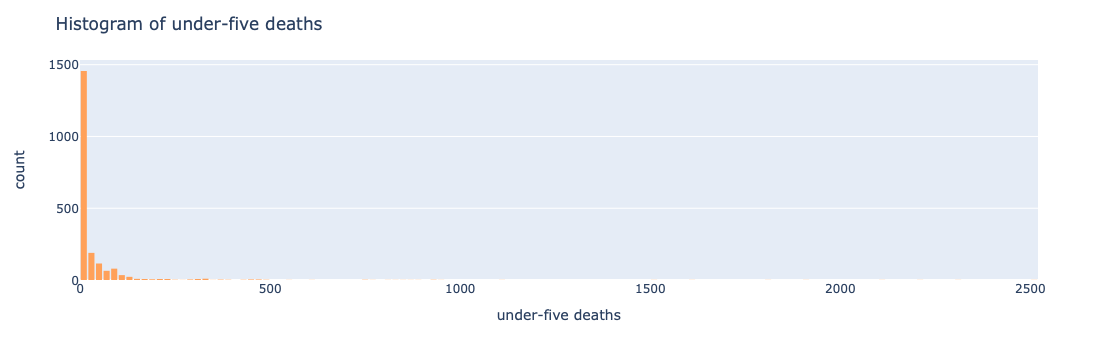

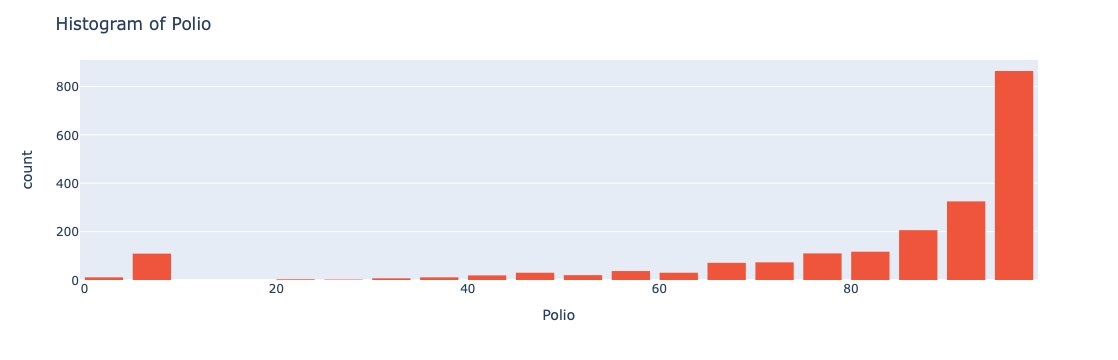

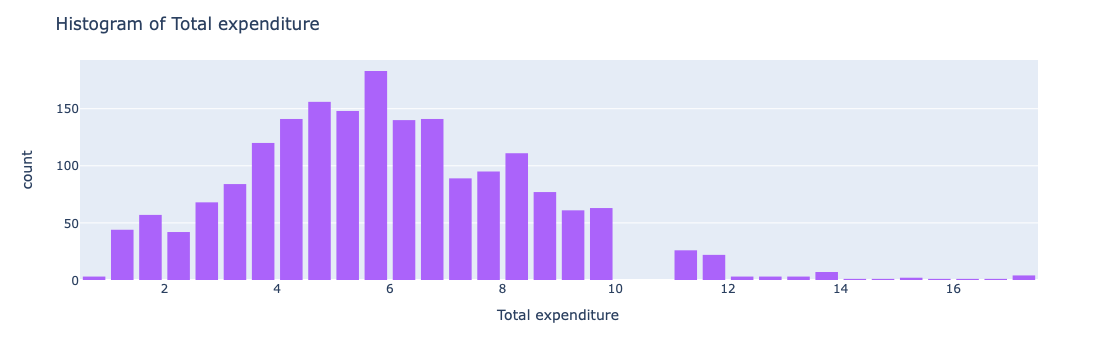

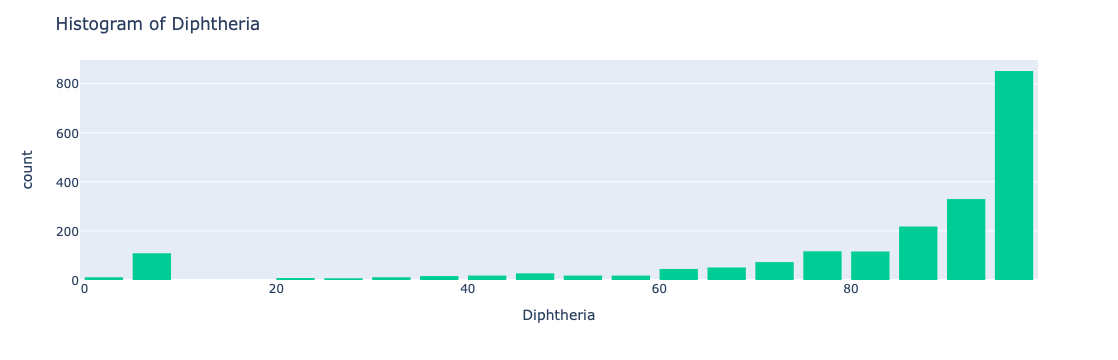

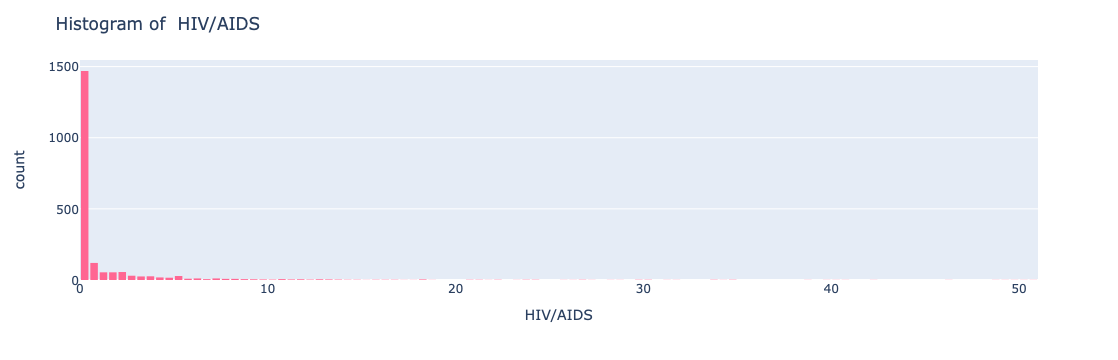

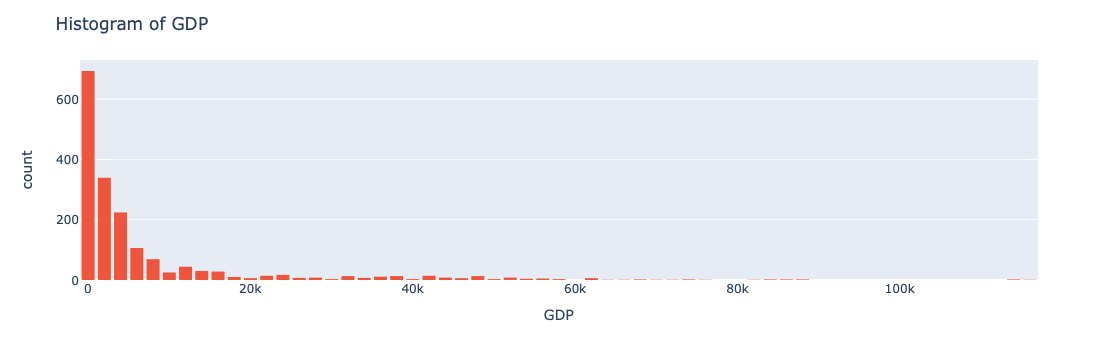

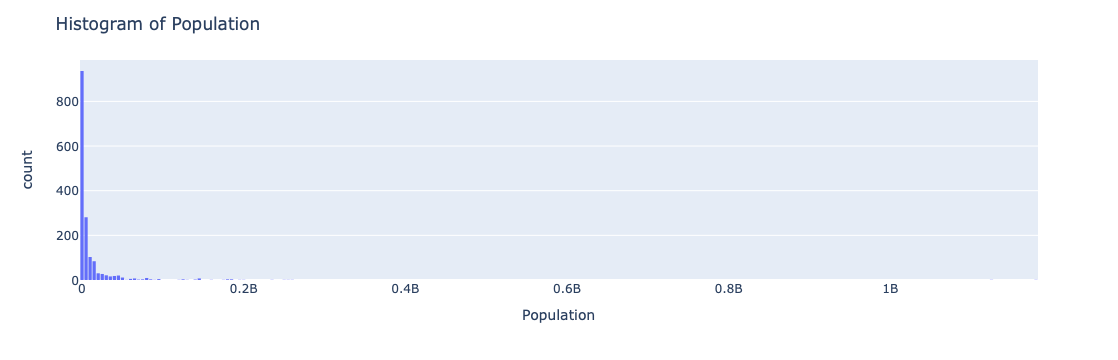

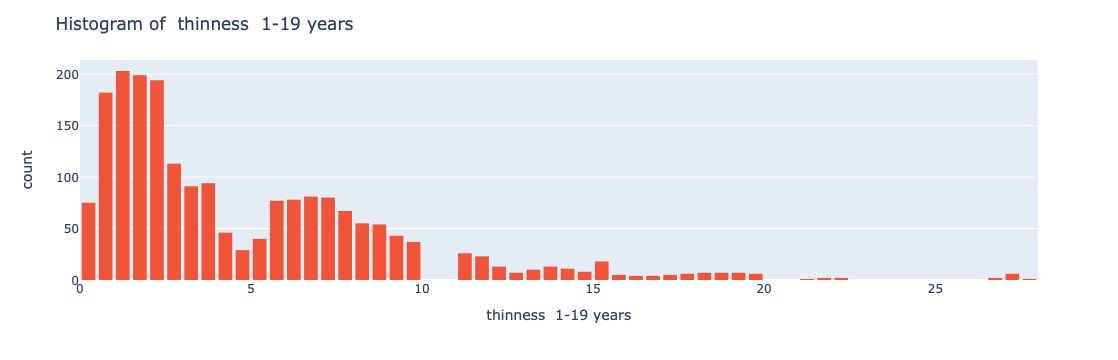

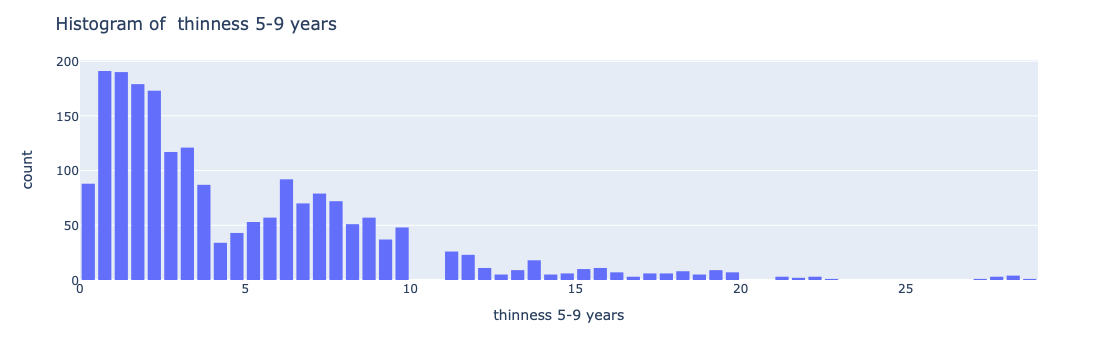

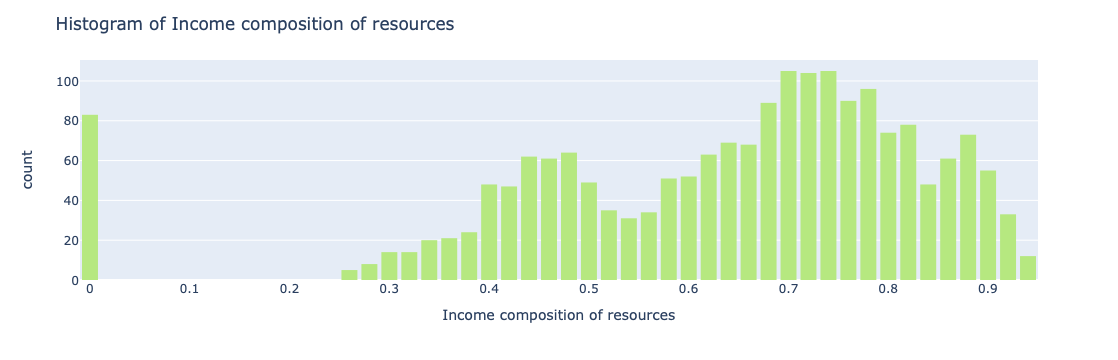

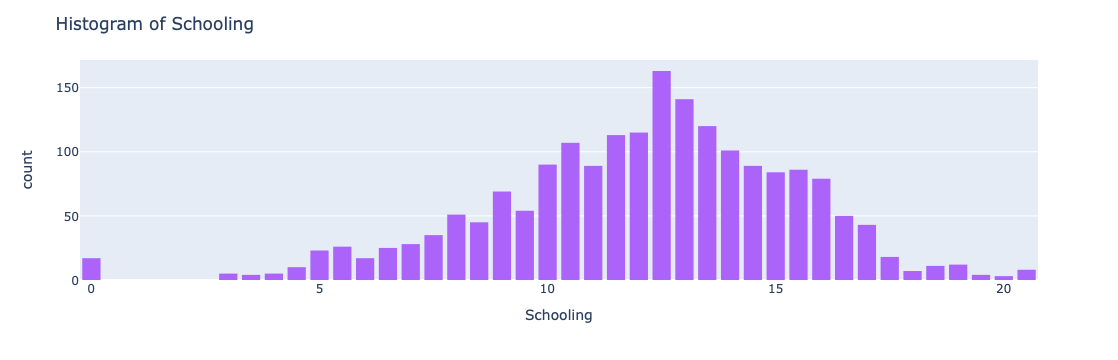

In [11]:
for column in plots :
    plot_histogram(df_train, column)

As we will try to predict life expectancy, let's have a more precise description 

In [12]:
print("Top 5 Countries with Most Life Expectancy")
print("="*10)
print(df_train.groupby("Country")['Life expectancy '].mean().sort_values(ascending=False).head(5))
print("="*10)
print("Top 10 Countries with Least Life Expectancy")
print("="*10)
print(df_train.groupby("Country")['Life expectancy '].mean().sort_values(ascending =True).head(5))

Top 5 Countries with Most Life Expectancy
Country
Iceland       82.77
Sweden        82.67
Switzerland   82.64
Canada        82.59
Japan         82.52
Name: Life expectancy , dtype: float64
Top 10 Countries with Least Life Expectancy
Country
Sierra Leone               45.74
Lesotho                    48.33
Angola                     48.43
Central African Republic   49.12
Zimbabwe                   49.26
Name: Life expectancy , dtype: float64


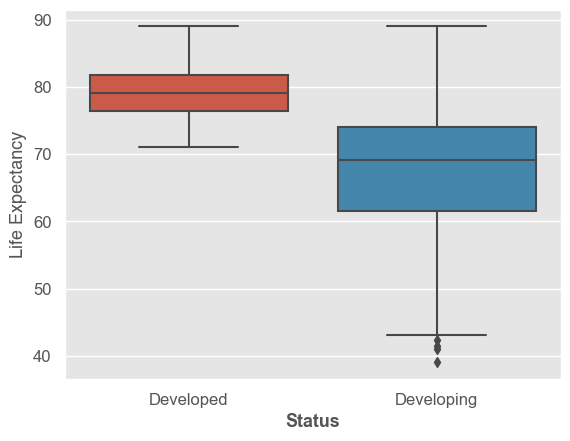

In [13]:
sns.boxplot(x= df_train["Status"],y = df_train['Life expectancy '],fliersize=5)
plt.xticks(fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Life Expectancy", fontsize= 13, fontweight="bold", name= "helvetica")
plt.xlabel("Status", fontsize=13, fontweight="bold")
plt.show()

As we can see, the more the country is developed, the highest life expectancy is.
Let's see if we can find correlation with GDP (Gross Domestic Product per capita (in USD))

In [14]:
print("Top 5 Countries with highest GDP")
print("="*10)
print(df_train.groupby("Country")['GDP'].mean().sort_values(ascending=False).head(5))
print("="*10)
print("Top 10 Countries with lowest GDP")
print("="*10)
print(df_train.groupby("Country")['GDP'].mean().sort_values(ascending =True).head(5))

Top 5 Countries with highest GDP
Country
Switzerland   63450.32
Qatar         53755.32
Luxembourg    49962.71
Australia     40174.71
Ireland       35802.42
Name: GDP, dtype: float64
Top 10 Countries with lowest GDP
Country
Nauru     136.18
Burundi   164.17
Niger     250.09
Rwanda    250.30
Liberia   258.68
Name: GDP, dtype: float64


Let's dig further, and analyse the population number.

In [15]:
print("Top 5 Countries with highest population")
print("="*10)
print(df_train.groupby("Country")['Population'].mean().sort_values(ascending=False).head(5))
print("="*10)
print("Top 10 Countries with lowest population")
print("="*10)
print(df_train.groupby("Country")['Population'].mean().sort_values(ascending =True).head(5))

Top 5 Countries with highest population
Country
India       288488922.44
Indonesia   118780907.11
Brazil      110099854.67
Pakistan     81184659.09
Nigeria      60801758.73
Name: Population, dtype: float64
Top 10 Countries with lowest population
Country
Palau         292.00
Maldives     6370.12
Georgia     10052.25
Sri Lanka   10225.08
Tonga       19036.90
Name: Population, dtype: float64


In [16]:
plots_num = ['Year', 'Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
             'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

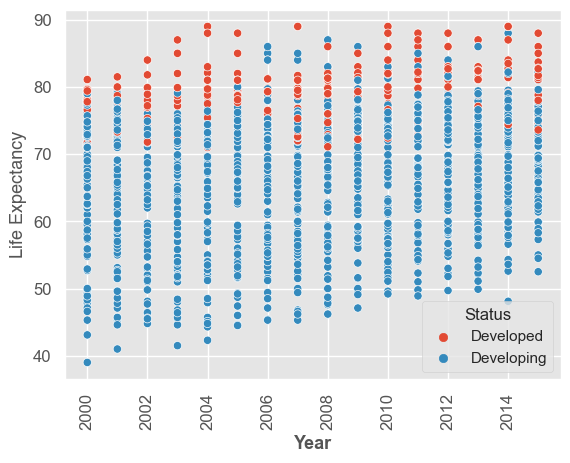

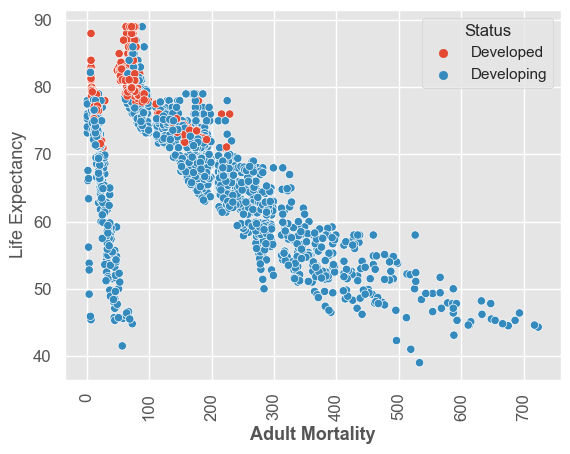

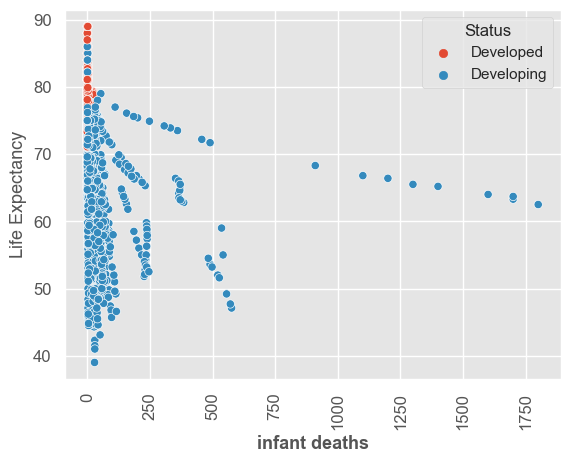

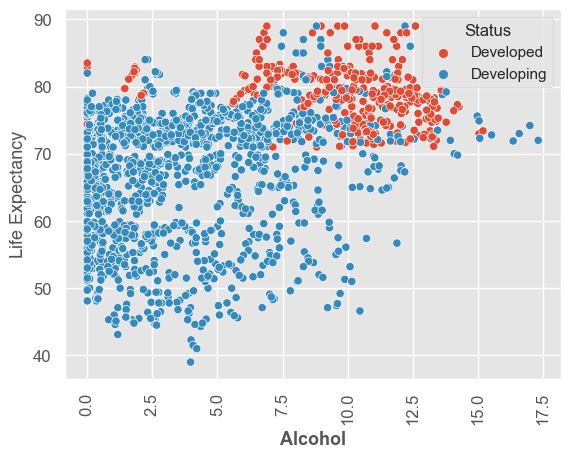

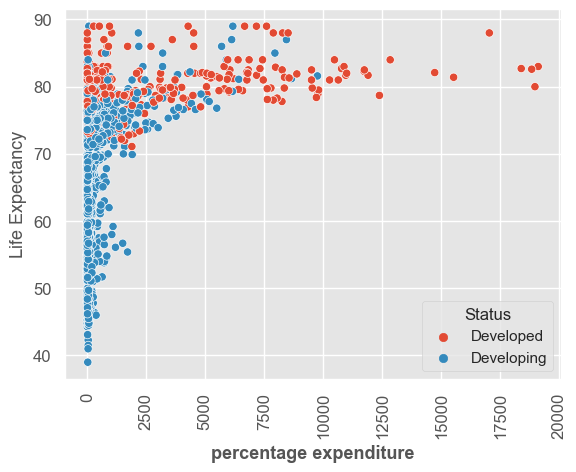

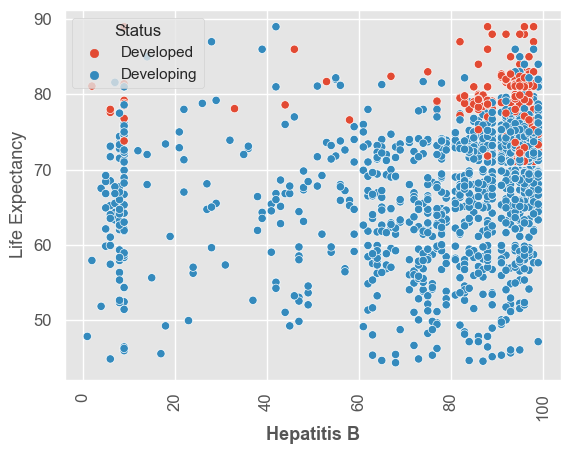

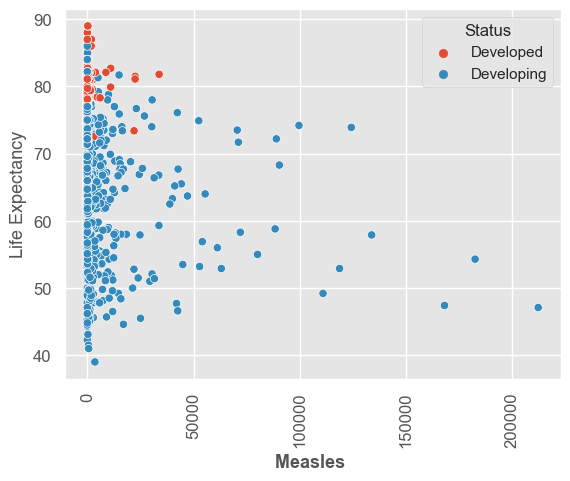

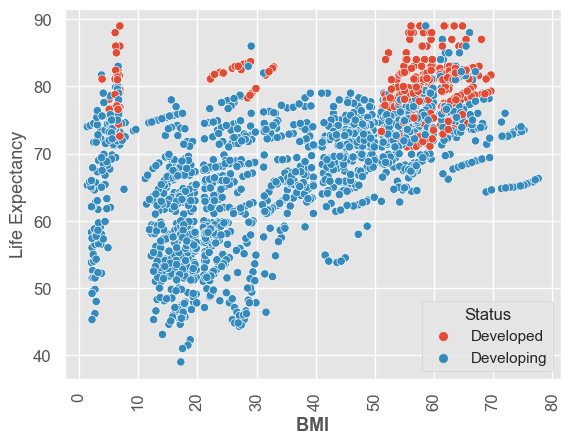

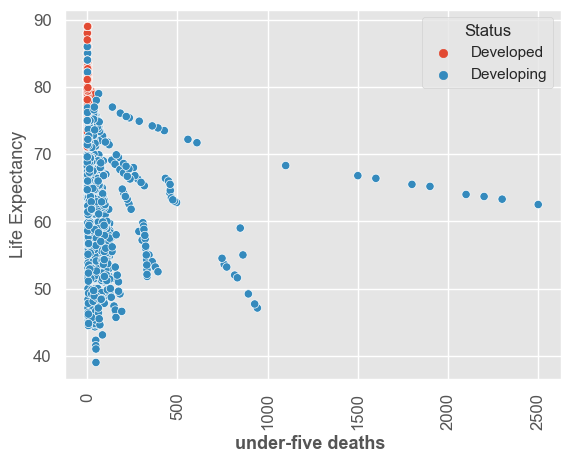

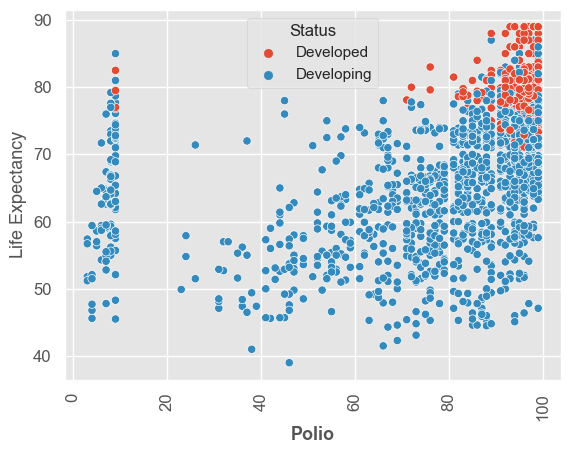

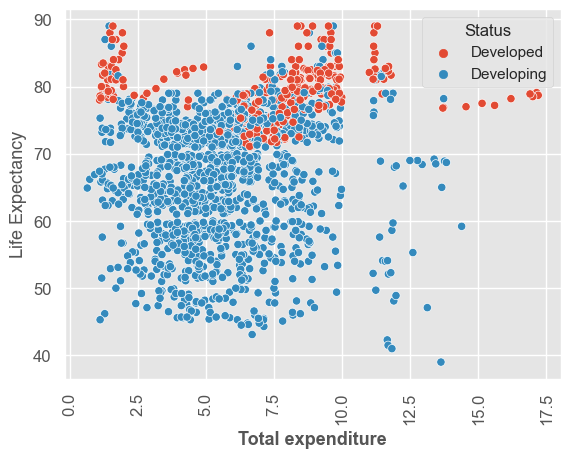

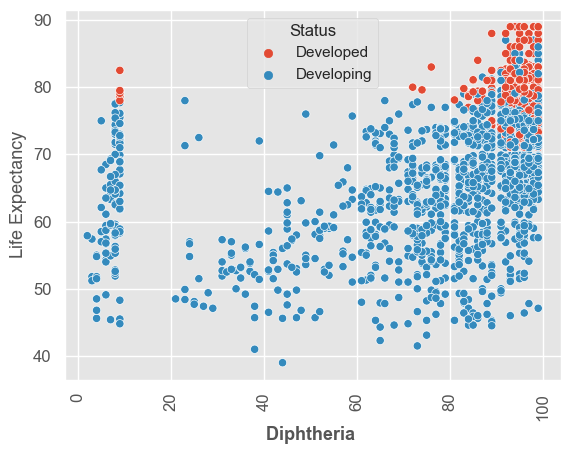

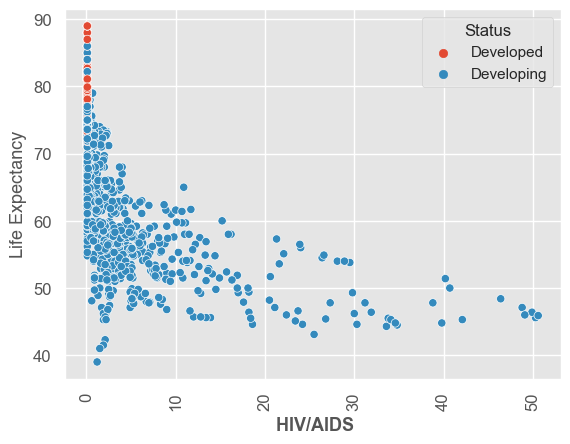

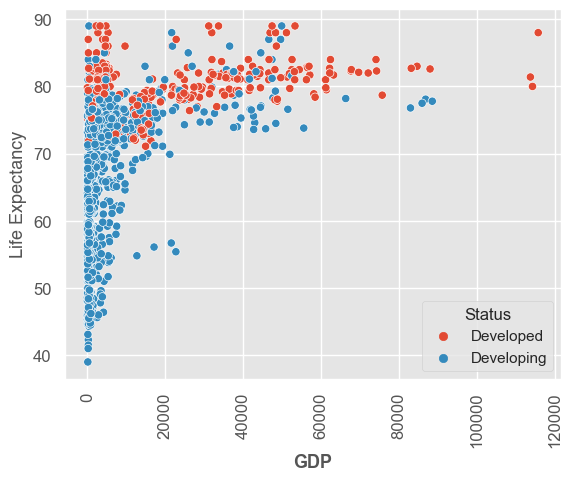

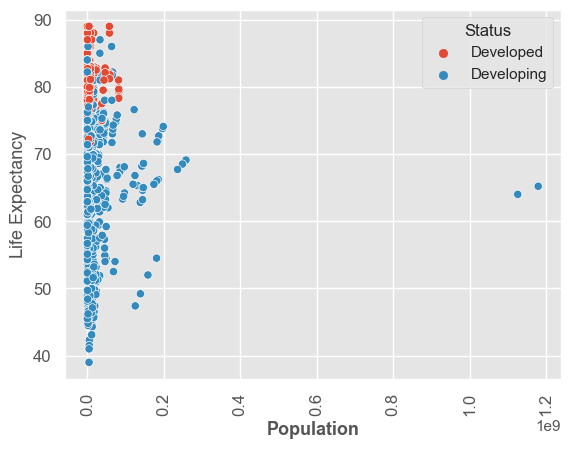

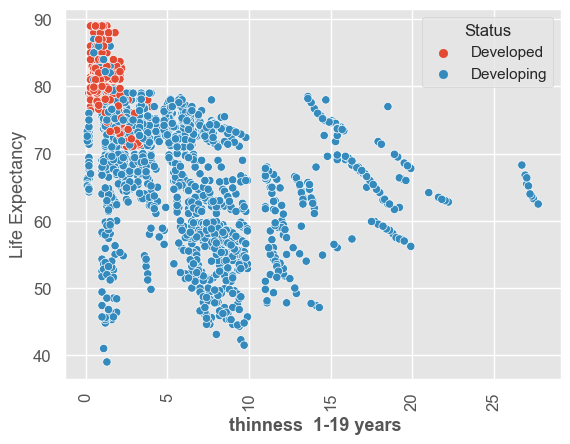

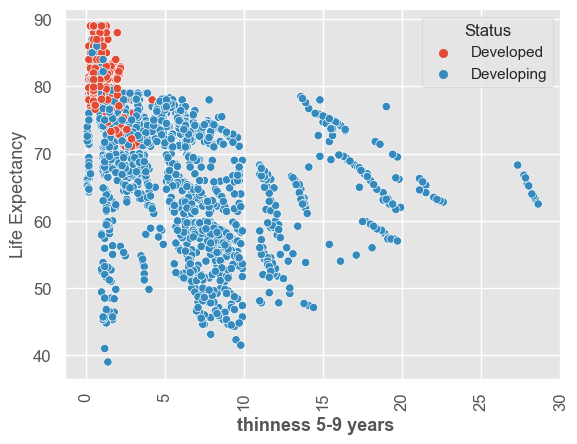

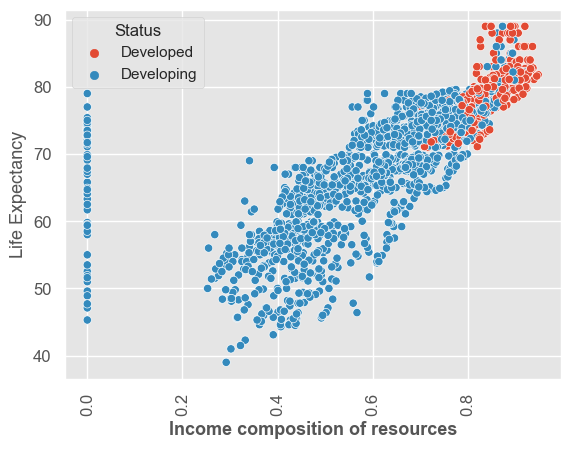

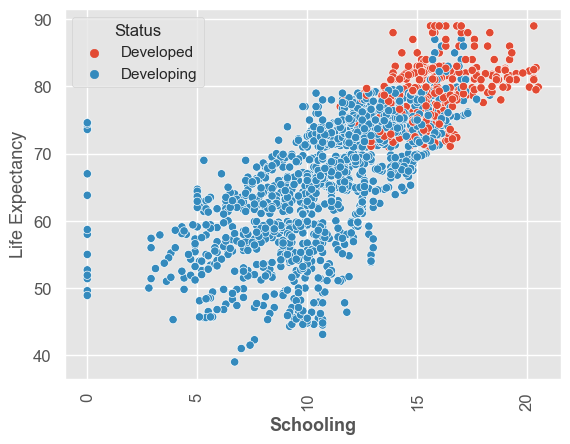

In [17]:
for column in plots_num:
    sns.scatterplot(x= df_train[column], y= df_train['Life expectancy '], hue= df_train['Status'])
    plt.xticks(rotation=90, fontsize= 12)
    plt.yticks(fontsize=12)
    plt.ylabel("Life Expectancy", fontsize= 13, fontweight="bold", name= "helvetica")
    plt.xlabel(column, fontsize=13, fontweight="bold")
    plt.show()


We can defenitely observe that developped countries have a highest life expectancy.  We can point out, that developped countries, having more schooling, higher GDP, higher expenditures and are less exposed to diseases have an actual higher life expectancy.

There are defenitely correlations between the features of our data. Let's implement a model that will try to predict life expectancy, and in the mean time see the features importance.

But first of all, let's deal with the missing values !!

### Preprocessing

I think it's interesting to fill the NaN values in a logical way. We're gonna fill the missing values with the median value of the corresponding Country and if not possible the global median value.

In [18]:
columns_to_fill = df_train.columns[df_train.isna().any()].tolist()
global_medians = df_train[columns_to_fill].median()

df_train_filled = df_train.copy()

for col in columns_to_fill:
    country_median = df_train.groupby('Country')[col].transform('median')
    df_train_filled[col] = df_train_filled[col].fillna(country_median)

df_train_filled[columns_to_fill] = df_train_filled[columns_to_fill].fillna(global_medians)

In [19]:
df_train_filled.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

To use a ML model, we need to get rid of strings/ object_type values. Let's encode Country, Year and Status.

In [21]:
country_enc= LabelEncoder()
df_train_filled['Country']= country_enc.fit_transform(df_train_filled['Country'])
df_train_filled['Country'].astype("int64")

0       104
1        37
2        25
3        70
4       114
       ... 
2051    104
2052     70
2053     72
2054     82
2055     55
Name: Country, Length: 2056, dtype: int64

In [90]:
year_enc= LabelEncoder()
year_enc.fit(df_train_filled['Year'])
df_train_filled['Year']= year_enc.transform(df_train_filled['Year'])
df_train_filled['Year'].astype("int64")

0        8
1        5
2        9
3       11
4        7
        ..
2051    11
2052    10
2053     7
2054     3
2055     5
Name: Year, Length: 2056, dtype: int64

In [83]:
df_train_filled['Year'].unique()

array([ 8,  5,  9, 11,  7, 14, 10,  4,  3, 12,  0, 13, 15,  2,  6,  1])

In [91]:
status_enc= LabelEncoder()
status_enc.fit(df_train_filled['Status'])
df_train_filled['Status']= status_enc.transform(df_train_filled['Status'])
df_train_filled['Status'].astype("int64")

0       0
1       1
2       1
3       1
4       1
       ..
2051    0
2052    1
2053    1
2054    0
2055    1
Name: Status, Length: 2056, dtype: int64

In [24]:
df_train_filled.head()

Country  Year  Status  Life expectancy   Adult Mortality  infant deaths  \
0      104     8       0             80.00            64.00              0   
1       37     5       1             55.30           394.00              8   
2       25     9       1             56.90           283.00             44   
3       70    11       1             57.10           289.00              4   
4      114     7       1             64.50           217.00             58   

   Alcohol  percentage expenditure  Hepatitis B  Measles   ...  Polio  \
0     7.14                 2655.57        86.00         1  ...  72.00   
1     2.03                    0.00        68.50       146  ...  62.00   
2     4.55                   81.14        92.00     54118  ...  91.00   
3     3.57                   40.45        86.00         0  ...  85.00   
4     0.26                    0.53        85.00      1088  ...  84.00   

   Total expenditure  Diphtheria    HIV/AIDS      GDP  Population  \
0               8.15        72.00       0.10 21928.77    49379.00   
1               2.42        62.00       5.90  1834.29  1385316.00   
2               7.41        92.00       1.10   552.75  1514199.00   
3               5.46        86.00       5.70   692.70  1596154.00   
4               1.68        86.00       0.60    41.45 49171586.00   

    thinness  1-19 years   thinness 5-9 years  \
0                   0.70                 0.70   
1                   8.80                 8.50   
2                   9.30                 8.80   
3                   7.80                 7.70   
4                  13.20                13.50   

   Income composition of resources  Schooling  
0                             0.81      14.60  
1                             0.50       9.40  
2                             0.36       5.90  
3                             0.41       9.00  
4                             0.48       8.10  

[5 rows x 22 columns]

Let's scale our data to have better performances.

In [25]:
feats_to_scale = ['Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

Let's use a robust scaler, usually less sensitive to extreme values

In [26]:
scaler = RobustScaler()

In [27]:
feats_scaled = scaler.fit_transform(df_train_filled[feats_to_scale])

Let's reconstruct  our data frame

In [28]:
feats_rescaled = df_train_filled.drop(['Country', 'Year', 'Status', 'Life expectancy '], axis=1).copy()
feats_rescaled[feats_to_scale] = feats_scaled

In [30]:
feats_rescaled.head()

Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0            -0.53          -0.14     0.49                    6.07   
1             1.64           0.24    -0.25                   -0.16   
2             0.91           1.95     0.12                    0.03   
3             0.95           0.05    -0.03                   -0.07   
4             0.48           2.62    -0.51                   -0.16   

   Hepatitis B  Measles    BMI   under-five deaths   Polio  Total expenditure  \
0        -0.29     -0.04   0.61               -0.15  -1.11               0.74   
1        -1.12      0.34  -0.61                0.35  -1.63              -1.02   
2         0.00    140.98  -0.76                2.81  -0.11               0.52   
3        -0.29     -0.04  -0.56                0.12  -0.42              -0.08   
4        -0.33      2.79  -0.72                2.85  -0.47              -1.24   

   Diphtheria    HIV/AIDS   GDP  Population   thinness  1-19 years  \
0        -1.15       0.00  4.74       -0.31                  -0.47   
1        -1.70       9.67  0.00        0.00                   1.00   
2        -0.05       1.67 -0.30        0.03                   1.09   
3        -0.38       9.33 -0.27        0.05                   0.82   
4        -0.38       0.83 -0.42       11.13                   1.80   

    thinness 5-9 years  Income composition of resources  Schooling  
0                -0.47                             0.49       0.56  
1                 0.95                            -0.70      -0.77  
2                 1.00                            -1.23      -1.67  
3                 0.80                            -1.03      -0.87  
4                 1.85                            -0.75      -1.10

In [31]:
data_train_ready = pd.concat([df_train_filled[['Country', 'Year', 'Status', 'Life expectancy ']], feats_rescaled], axis =1)

In [32]:
data_train_ready.head()

Country  Year  Status  Life expectancy   Adult Mortality  infant deaths  \
0      104     8       0             80.00            -0.53          -0.14   
1       37     5       1             55.30             1.64           0.24   
2       25     9       1             56.90             0.91           1.95   
3       70    11       1             57.10             0.95           0.05   
4      114     7       1             64.50             0.48           2.62   

   Alcohol  percentage expenditure  Hepatitis B  Measles   ...  Polio  \
0     0.49                    6.07        -0.29     -0.04  ...  -1.11   
1    -0.25                   -0.16        -1.12      0.34  ...  -1.63   
2     0.12                    0.03         0.00    140.98  ...  -0.11   
3    -0.03                   -0.07        -0.29     -0.04  ...  -0.42   
4    -0.51                   -0.16        -0.33      2.79  ...  -0.47   

   Total expenditure  Diphtheria    HIV/AIDS   GDP  Population  \
0               0.74        -1.15       0.00  4.74       -0.31   
1              -1.02        -1.70       9.67  0.00        0.00   
2               0.52        -0.05       1.67 -0.30        0.03   
3              -0.08        -0.38       9.33 -0.27        0.05   
4              -1.24        -0.38       0.83 -0.42       11.13   

    thinness  1-19 years   thinness 5-9 years  \
0                  -0.47                -0.47   
1                   1.00                 0.95   
2                   1.09                 1.00   
3                   0.82                 0.80   
4                   1.80                 1.85   

   Income composition of resources  Schooling  
0                             0.49       0.56  
1                            -0.70      -0.77  
2                            -1.23      -1.67  
3                            -1.03      -0.87  
4                            -0.75      -1.10  

[5 rows x 22 columns]

Let's save our cleaned data in a new csv document

In [33]:
#data_train_ready.to_csv('data_train_preprocessed.csv', index=False)

### Let's beging

In [34]:
data = pd.read_csv('data_train_preprocessed.csv')

<Axes: >

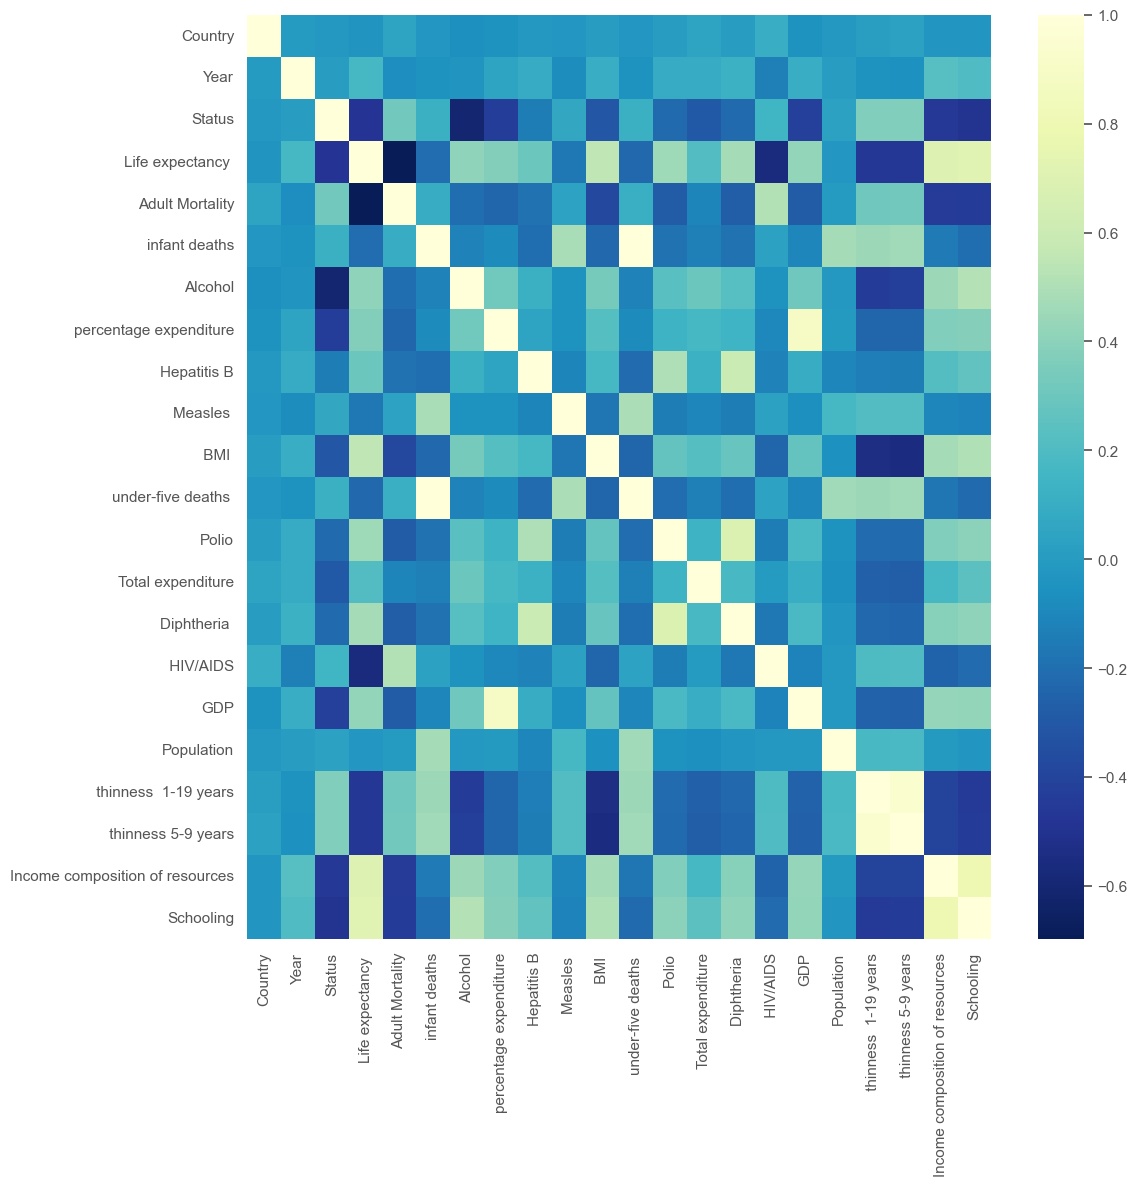

In [35]:
plt.figure(figsize= [12,12])
sns.heatmap(data.corr(), annot=False, cmap= "YlGnBu_r")

### Splitting our data 

In [36]:
X = data.drop(['Life expectancy '], axis =1)
y = data['Life expectancy ']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1644, 21), (412, 21), (1644,), (412,))

### Models training and metrics

As we are here trying to predict continuous values, that is the Life Expectancy, let's try different Algorithms suited for this use case.

In [39]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.model_selection import cross_val_score


In [40]:
algorithms = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), DecisionTreeRegressor(), 
              LinearRegression(), SVR(), XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)]


In [41]:
results_list = []

for alg in algorithms:
    model = alg
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    rmse_train = np.sqrt(mse(y_train, y_pred_train))
    rmse_test = np.sqrt(mse(y_test, y_pred_test))
    results_list.append({'Algorithm': str(alg), 'Metric': 'Root Mean Square Error', 'Train Value': rmse_train, 'Test Value': rmse_test})

    mae_train = mae(y_train, y_pred_train)
    mae_test = mae(y_test, y_pred_test)
    results_list.append({'Algorithm': str(alg), 'Metric': 'Mean Absolute Error', 'Train Value': mae_train, 'Test Value': mae_test})

    mape_train = mape(y_train, y_pred_train)
    mape_test = mape(y_test, y_pred_test)
    results_list.append({'Algorithm': str(alg), 'Metric': 'Mean Absolute Percentage Error', 'Train Value': mape_train, 'Test Value': mape_test})

df_results = pd.DataFrame(results_list)


In [42]:
df_results.head(5)

Algorithm                          Metric  Train Value  \
0  RandomForestRegressor()          Root Mean Square Error         0.78   
1  RandomForestRegressor()             Mean Absolute Error         0.49   
2  RandomForestRegressor()  Mean Absolute Percentage Error         0.01   
3      AdaBoostRegressor()          Root Mean Square Error         2.88   
4      AdaBoostRegressor()             Mean Absolute Error         2.33   

   Test Value  
0        1.82  
1        1.21  
2        0.02  
3        3.11  
4        2.52

### Evaluation 

    Why use the Mean Absolute Error (MAE) as our metric for models evaluation ?

- MAE is used for regression tasks where the goal is to predict a continuous numerical value.
- For Regression Tasks, MAE measures the average absolute difference between the predicted values and the actual values.
- It provides a measure of the average magnitude of errors made by the model.

    Main advantages : 
- It is less sensitive to outliers compared to other regression metrics like Mean Squared Error (MSE).
- MAE is reported in the same scale as the target variable.
- MAE is less sensitive to outliers and provides a more robust measure of average prediction error.


In [43]:
sorted_results = df_results.groupby("Metric").apply(lambda x: x.sort_values('Test Value', ascending=True))

In [44]:
sorted_results.head(30)

Algorithm  \
Metric                                                                                 
Mean Absolute Error            1                             RandomForestRegressor()   
                               7                         GradientBoostingRegressor()   
                               19  XGBRegressor(base_score=None, booster=None, ca...   
                               10                            DecisionTreeRegressor()   
                               4                                 AdaBoostRegressor()   
                               13                                 LinearRegression()   
                               16                                              SVR()   
Mean Absolute Percentage Error 2                             RandomForestRegressor()   
                               8                         GradientBoostingRegressor()   
                               11                            DecisionTreeRegressor()   
                               20  XGBRegressor(base_score=None, booster=None, ca...   
                               5                                 AdaBoostRegressor()   
                               14                                 LinearRegression()   
                               17                                              SVR()   
Root Mean Square Error         0                             RandomForestRegressor()   
                               6                         GradientBoostingRegressor()   
                               18  XGBRegressor(base_score=None, booster=None, ca...   
                               9                             DecisionTreeRegressor()   
                               3                                 AdaBoostRegressor()   
                               12                                 LinearRegression()   
                               15                                              SVR()   

                                                           Metric  \
Metric                                                              
Mean Absolute Error            1              Mean Absolute Error   
                               7              Mean Absolute Error   
                               19             Mean Absolute Error   
                               10             Mean Absolute Error   
                               4              Mean Absolute Error   
                               13             Mean Absolute Error   
                               16             Mean Absolute Error   
Mean Absolute Percentage Error 2   Mean Absolute Percentage Error   
                               8   Mean Absolute Percentage Error   
                               11  Mean Absolute Percentage Error   
                               20  Mean Absolute Percentage Error   
                               5   Mean Absolute Percentage Error   
                               14  Mean Absolute Percentage Error   
                               17  Mean Absolute Percentage Error   
Root Mean Square Error         0           Root Mean Square Error   
                               6           Root Mean Square Error   
                               18          Root Mean Square Error   
                               9           Root Mean Square Error   
                               3           Root Mean Square Error   
                               12          Root Mean Square Error   
                               15          Root Mean Square Error   

                                   Train Value  Test Value  
Metric                                                      
Mean Absolute Error            1          0.49        1.21  
                               7          1.31        1.61  
                               19         1.31        1.61  
                               10         0.00        1.62  
                               4          2.33        2.52  
                               13  

In [45]:
for alg in algorithms:
    scores = cross_val_score(alg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    print(f'{alg.__class__.__name__}: Mean MAE: {-scores.mean()}, Std: {scores.std()}')

RandomForestRegressor: Mean MAE: 1.419177018311217, Std: 0.09492579047798563
AdaBoostRegressor: Mean MAE: 2.464330117801892, Std: 0.06563212490137986
GradientBoostingRegressor: Mean MAE: 1.7054276268319615, Std: 0.09894555291704615
DecisionTreeRegressor: Mean MAE: 2.0623495070057083, Std: 0.21761199967727973
LinearRegression: Mean MAE: 3.0792551319199712, Std: 0.09308566785524906
SVR: Mean MAE: 5.747407399312454, Std: 0.31002410221830484
XGBRegressor: Mean MAE: 1.70436803338402, Std: 0.09377175613213966


    As we can see from those results, our Random Forest Regressor gives us the best results.
    Let's embetter the Random Forest results !

In [46]:
from sklearn.model_selection import GridSearchCV
rfr = RandomForestRegressor()

In [47]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rfr, param_grid=param_dist, scoring='neg_mean_absolute_error', cv=5)

The reason for negation is that the convention in scikit-learn is to maximize the scoring metric, but in the case of error metrics like MAE, lower values are better. By negating the error metric, the optimization process seeks to find hyperparameters that result in a lower (i.e., more negative) mean absolute error.

In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 25, 30, 35, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_absolute_error')

In [50]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [51]:
y_pred = best_model.predict(X_test)

In [52]:
mae_rfr = mae(y_test, y_pred)
print(f"Best Model Mean Absolute Error on Test Set: {mae_rfr}")
print(f"Best Hyperparameters: {best_params}")

Best Model Mean Absolute Error on Test Set: 1.1944592618277068
Best Hyperparameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


### Let's predict life expectancy with our testing data

In [65]:
df_test = pd.read_csv('who-life-expectancy-prediction/testing-data.csv')
df_test.head()

Country  Year      Status  Adult Mortality  infant deaths  \
0  Syrian Arab Republic  2006  Developing           123.00              8   
1               Croatia  2006   Developed           113.00              0   
2            Montenegro  2007  Developing           125.00              0   
3               Bahrain  2014  Developing             7.00              0   
4                 Kenya  2000  Developing           428.00             77   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0     0.97                  122.65        83.00       517  48.50  ...   
1    11.83                 1555.65          NaN         1  58.10  ...   
2     4.98                  678.52         9.00         0  57.20  ...   
3     1.57                  367.26        98.00        46  62.90  ...   
4     1.51                    0.68          NaN     21002  14.40  ...   

   Total expenditure  Diphtheria    HIV/AIDS      GDP  Population  \
0               3.78         8.00       0.10  1762.25 18914977.00   
1               6.95        96.00       0.10 11363.42      444.00   
2               6.74        92.00       0.10  5957.15   615875.00   
3               4.98        98.00       0.10 24983.38         NaN   
4               4.68        82.00      18.10    43.98  3145483.00   

    thinness  1-19 years   thinness 5-9 years  \
0                   6.40                 6.30   
1                   1.80                 1.80   
2                   2.10                 2.20   
3                   6.10                 6.00   
4                   9.20                 9.10   

   Income composition of resources  Schooling  Row_id  
0                             0.64      11.40       0  
1                             0.78      13.90       1  
2                             0.76      13.60       2  
3                             0.82      14.50       3  
4                             0.45       8.40       4  

[5 rows x 22 columns]

In [66]:
df_test.isna().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                      4
infant deaths                        0
Alcohol                             58
percentage expenditure               0
Hepatitis B                        183
Measles                              0
 BMI                                10
under-five deaths                    0
Polio                                8
Total expenditure                   68
Diphtheria                           8
 HIV/AIDS                            0
GDP                                151
Population                         208
 thinness  1-19 years               10
 thinness 5-9 years                 10
Income composition of resources     57
Schooling                           54
Row_id                               0
dtype: int64

In [67]:
columns_to_fill = df_test.columns[df_test.isna().any()].tolist()

In [68]:
global_medians = df_test[columns_to_fill].median()

df_test_filled = df_test.copy()

for col in columns_to_fill:
    country_median = df_test.groupby('Country')[col].transform('median')
    df_test_filled[col] = df_test_filled[col].fillna(country_median)

df_test_filled[columns_to_fill] = df_test_filled[columns_to_fill].fillna(global_medians)

In [69]:
df_test_filled = df_test_filled.drop(['Row_id'], axis = 1)

In [72]:
try:
    df_test_filled["Country"] = country_enc.transform(df_test_filled["Country"])
except ValueError:
    unseen_labels = set(df_test_filled["Country"]) - set(country_enc.classes_)
    new_label_mapping = {label: len(country_enc.classes_) + idx for idx, label in enumerate(unseen_labels)}
    df_test_filled['Country'] = df_test_filled["Country"].map(new_label_mapping)

    country_enc.classes_ = np.concatenate((country_enc.classes_, list(unseen_labels)))


df_test_filled["Country"] = df_test_filled["Country"].astype("int64")

In [95]:
df_test_filled['Year'] = year_enc.fit_transform(df_test_filled['Year']).astype("int64")

In [99]:
df_test_filled['Status'] = status_enc.fit_transform(df_test_filled['Status']).astype("int64")

In [101]:
df_test_filled[['Country', "Year", "Status"]].head() 

Country  Year  Status
0      164     6       1
1       40     6       0
2      111     7       1
3       11    14       1
4       87     0       1

In [102]:
feats_test_scaled = scaler.transform(df_test_filled[feats_to_scale])

In [103]:
feats_test_rescaled = df_test_filled.drop(['Country', 'Year', 'Status'], axis=1).copy()

In [104]:
feats_test_rescaled[feats_to_scale] = feats_test_scaled

In [105]:
data_test_ready = pd.concat([df_test_filled[['Country', 'Year', 'Status']], feats_test_rescaled], axis =1)

In [106]:
data_test_ready.head()

Country  Year  Status  Adult Mortality  infant deaths  Alcohol  \
0      164     6       1            -0.14           0.24    -0.41   
1       40     6       0            -0.20          -0.14     1.18   
2      111     7       1            -0.12          -0.14     0.18   
3       11    14       1            -0.90          -0.14    -0.32   
4       87     0       1             1.87           3.52    -0.33   

   percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
0                    0.13        -0.43      1.30   0.12  ...  -0.53   
1                    3.49         0.14     -0.04   0.38  ...   0.16   
2                    1.43        -3.95     -0.04   0.36  ...  -0.05   
3                    0.70         0.29      0.08   0.51  ...   0.26   
4                   -0.16        -0.38     54.68  -0.81  ...  -4.47   

   Total expenditure  Diphtheria    HIV/AIDS   GDP  Population  \
0              -0.60        -4.66       0.00 -0.02        4.08   
1               0.37         0.16       0.00  2.25       -0.32   
2               0.31        -0.05       0.00  0.97       -0.18   
3              -0.23         0.27       0.00  5.46        0.00   
4              -0.32        -0.60      30.00 -0.42        0.41   

    thinness  1-19 years   thinness 5-9 years  \
0                   0.56                 0.55   
1                  -0.27                -0.27   
2                  -0.22                -0.20   
3                   0.51                 0.49   
4                   1.07                 1.05   

   Income composition of resources  Schooling  
0                            -0.17      -0.26  
1                             0.38       0.38  
2                             0.30       0.31  
3                             0.52       0.54  
4                            -0.88      -1.03  

[5 rows x 21 columns]

In [107]:
data_test_ready.shape

(882, 21)

In [108]:
test_pred = best_model.predict(data_test_ready)

In [109]:
len(test_pred)

882

In [110]:
data_test_ready['Life expectancy predicted'] = test_pred

In [111]:
data_test_ready.head()

Country  Year  Status  Adult Mortality  infant deaths  Alcohol  \
0      164     6       1            -0.14           0.24    -0.41   
1       40     6       0            -0.20          -0.14     1.18   
2      111     7       1            -0.12          -0.14     0.18   
3       11    14       1            -0.90          -0.14    -0.32   
4       87     0       1             1.87           3.52    -0.33   

   percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0                    0.13        -0.43      1.30   0.12  ...   
1                    3.49         0.14     -0.04   0.38  ...   
2                    1.43        -3.95     -0.04   0.36  ...   
3                    0.70         0.29      0.08   0.51  ...   
4                   -0.16        -0.38     54.68  -0.81  ...   

   Total expenditure  Diphtheria    HIV/AIDS   GDP  Population  \
0              -0.60        -4.66       0.00 -0.02        4.08   
1               0.37         0.16       0.00  2.25       -0.32   
2               0.31        -0.05       0.00  0.97       -0.18   
3              -0.23         0.27       0.00  5.46        0.00   
4              -0.32        -0.60      30.00 -0.42        0.41   

    thinness  1-19 years   thinness 5-9 years  \
0                   0.56                 0.55   
1                  -0.27                -0.27   
2                  -0.22                -0.20   
3                   0.51                 0.49   
4                   1.07                 1.05   

   Income composition of resources  Schooling  Life expectancy predicted  
0                            -0.17      -0.26                      73.04  
1                             0.38       0.38                      76.22  
2                             0.30       0.31                      75.16  
3                             0.52       0.54                      75.91  
4                            -0.88      -1.03                      51.75  

[5 rows x 22 columns]

Let's decode our data to see the life expectancy predicted of the different countries, years and wether they're developped or developping

In [112]:
data_test_ready['Country'] = country_enc.inverse_transform(data_test_ready['Country'])
data_test_ready['Year'] = year_enc.inverse_transform(data_test_ready['Year'])
data_test_ready['Status'] = status_enc.inverse_transform(data_test_ready['Status'])

In [113]:
data_test_ready.head()

Country  Year      Status  Adult Mortality  infant deaths  \
0  Syrian Arab Republic  2006  Developing            -0.14           0.24   
1               Croatia  2006   Developed            -0.20          -0.14   
2            Montenegro  2007  Developing            -0.12          -0.14   
3               Bahrain  2014  Developing            -0.90          -0.14   
4                 Kenya  2000  Developing             1.87           3.52   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0    -0.41                    0.13        -0.43      1.30   0.12  ...   
1     1.18                    3.49         0.14     -0.04   0.38  ...   
2     0.18                    1.43        -3.95     -0.04   0.36  ...   
3    -0.32                    0.70         0.29      0.08   0.51  ...   
4    -0.33                   -0.16        -0.38     54.68  -0.81  ...   

   Total expenditure  Diphtheria    HIV/AIDS   GDP  Population  \
0              -0.60        -4.66       0.00 -0.02        4.08   
1               0.37         0.16       0.00  2.25       -0.32   
2               0.31        -0.05       0.00  0.97       -0.18   
3              -0.23         0.27       0.00  5.46        0.00   
4              -0.32        -0.60      30.00 -0.42        0.41   

    thinness  1-19 years   thinness 5-9 years  \
0                   0.56                 0.55   
1                  -0.27                -0.27   
2                  -0.22                -0.20   
3                   0.51                 0.49   
4                   1.07                 1.05   

   Income composition of resources  Schooling  Life expectancy predicted  
0                            -0.17      -0.26                      73.04  
1                             0.38       0.38                      76.22  
2                             0.30       0.31                      75.16  
3                             0.52       0.54                      75.91  
4                            -0.88      -1.03                      51.75  

[5 rows x 22 columns]

### Let's save our model in a pickle file to use later for our WebAPI

In [116]:
import pickle
model_path = 'model/RFRegressor_trained.pkl'
with open(model_path, 'wb') as model_file:
    pickle.dump(best_model, model_file)